In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

from matplotlib.ticker import PercentFormatter

myFmt1 = PercentFormatter(xmax=1, decimals=0, symbol= ' %')
myFmt100 = PercentFormatter(xmax=100, decimals=0, symbol= ' %')

In [2]:
df=pd.read_csv('http://taanila.fi/Electric_Production.csv')
df.index=pd.to_datetime(df['DATE'],format='%m/%d/%Y')
df=df.drop('DATE',axis=1)
df.head(12)

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904
1985-07-01,62.6202
1985-08-01,63.2485
1985-09-01,60.5846


In [3]:
df.tail(12)

,IPG2211A2N
DATE,
2017-02-01,99.4901
2017-03-01,101.0396
2017-04-01,88.3530
2017-05-01,92.0805
2017-06-01,102.1532
2017-07-01,112.1538
2017-08-01,108.9312
2017-09-01,98.6154
2017-10-01,93.6137


Pystymmen havaita sähkön vuotuisen kasvun nousevan

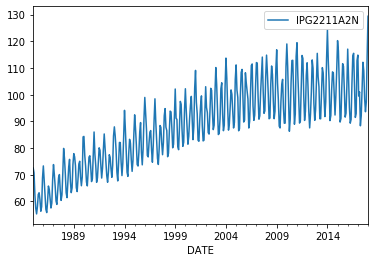

In [4]:
df.plot.line()

data = df

In [5]:
malli = ExponentialSmoothing(data['IPG2211A2N'], seasonal_periods=12, 
                            trend='add', seasonal='mul').fit()

C:\Users\roope\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


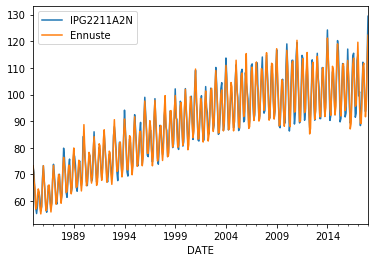

In [6]:
data['Ennuste'] = malli.fittedvalues

data.plot()

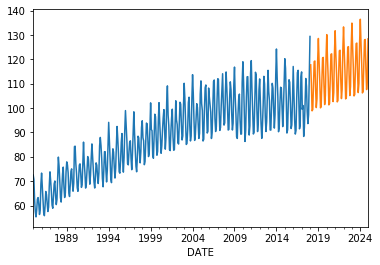

In [7]:
index = pd.date_range('2018-01-01', periods=84, freq='MS')

datap = pd.DataFrame(malli.forecast(84), index=index)

datap.columns = ['Ennuste']

data['IPG2211A2N'].plot()

datap['Ennuste'].plot()

In [8]:
#Ennuste on huono sillä se ei huomioi tuotannnon kasvun hidastusta. Täten kavennetaan aikasarjaa, josta ennuste tehdään
data2 = data['01-01-2008':'2018-01-01']
malli2 = ExponentialSmoothing(data2['IPG2211A2N'], seasonal_periods=12, 
                            trend='add', seasonal='mul').fit()

C:\Users\roope\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


C:\Users\roope\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


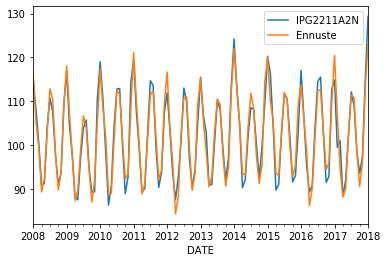

In [9]:
data2['Ennuste'] = malli2.fittedvalues

data2.plot()

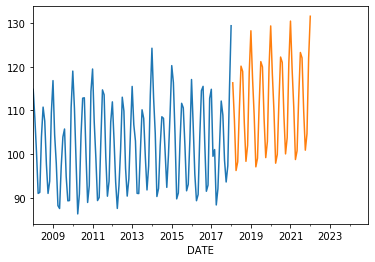

In [10]:
index2 = pd.date_range('2018-01-01', periods=48, freq='MS')

datap2 = pd.DataFrame(malli2.forecast(48), index=index)

datap2.columns = ['Ennuste']

data2['IPG2211A2N']['01-01-2008':'2018-01-01'].plot()

datap2['Ennuste'].plot()

Verrataan vuosien 2017 ja 1985 sähkön tuotantoa

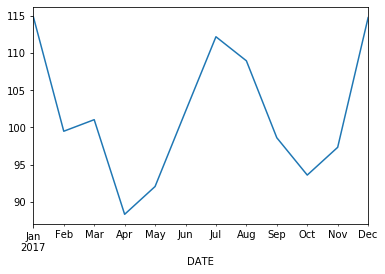

In [11]:
ax1 = data['IPG2211A2N']['2017':'2017-12-01'].plot()

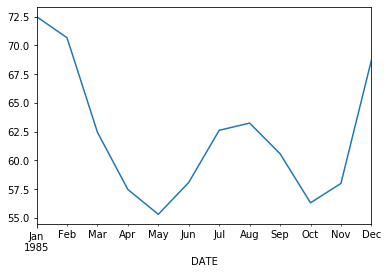

In [12]:
ax2 = data['IPG2211A2N']['1985':'1985-12-01'].plot()

Sähköä tuotettiin vuonna 2017 suhteellisesti enemmän kesäkuukausina. Myös sähkön tuottanto on kasvanut vuodesta 1985, vaikka se on kasvu on hidastunut viimeisen kymmenen vuoden aikana.